In [1]:
# Testing SVR Model With Microsoft Stock

In [26]:
import os
import sys
import pandas as pd
import seaborn as sns
import pandas as pd
import ta
import matplotlib.dates as mdates
from sklearn.svm import SVR
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.svm import SVR

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from src.visualization.visualize import DisplayTicker
from src.features.build_features import BuildFeatures


In [27]:
def convert_data(stock_ticker_csv):
    """
    Takes in a CSV File and converts the date to numbers
    Returns DF with Dates converted to numerical format and the original Dates for plotting
    """
    stock_ticker = pd.read_csv(stock_ticker_csv, index_col=['Date'], parse_dates=['Date'])
    stock_ticker.sort_values('Date')
    stock_ticker.reset_index(inplace=True)

    DF_Train_Index = round(len(stock_ticker) * .90)
    # Train Split 90%
    DF_Train = stock_ticker[:DF_Train_Index]
    #print(len(DF_Train))
    #print(len(DF_Test))
    #print("**************")
    dates_df = stock_ticker.copy()
    dates_df = dates_df.reset_index()
    org_dates = dates_df['Date']
    #print(dates_df[:10])
    #print("-------------")
    #print(org_dates[:5])

    # Converting Dates to Numbers - SVR doesn't work with dates
    dates_df['Date'] = dates_df['Date'].map(mdates.date2num)
    #print(dates_df['Date'][:5])

    # Return DF with Dates converted to numerical format and the original Dates for plotting
    return dates_df, org_dates
MSFT, MSFT_dates = convert_data('./.data/MSFT.csv')
AAPL, AAPL_dates = convert_data('./.data/MSFT.csv')
AAPL, AAPL_dates = convert_data('./.data/MSFT.csv')
GOOG, GOOG_dates = convert_data('./.data/MSFT.csv')
_GSPC, _GSPC_dates = convert_data('./.data/MSFT.csv')

print("######################")
print(MSFT[:5])
print(MSFT_dates[:5])
print(MSFT_dates[-5:])

######################
   index      Date       Open       High        Low      Close  Adj Close  \
0      0  733132.0  27.879999  28.590000  27.840000  28.379999  21.455233   
1      1  733133.0  28.830000  29.540001  28.629999  29.500000  22.301943   
2      2  733134.0  29.570000  29.580000  29.000000  29.160000  22.044899   
3      3  733135.0  29.000000  29.320000  28.799999  29.000000  21.923944   
4      4  733136.0  29.129999  29.260000  28.740000  29.160000  22.044899   

     Volume  
0  46780600  
1  65796200  
2  49499400  
3  38961400  
4  43860800  
0   2008-03-31
1   2008-04-01
2   2008-04-02
3   2008-04-03
4   2008-04-04
Name: Date, dtype: datetime64[ns]
2996   2020-02-24
2997   2020-02-25
2998   2020-02-26
2999   2020-02-27
3000   2020-02-28
Name: Date, dtype: datetime64[ns]


In [23]:
print(MSFT_dates[-60:-30])
print("++++++")
print(MSFT_dates[-30:])

2941   2019-12-03
2942   2019-12-04
2943   2019-12-05
2944   2019-12-06
2945   2019-12-09
2946   2019-12-10
2947   2019-12-11
2948   2019-12-12
2949   2019-12-13
2950   2019-12-16
2951   2019-12-17
2952   2019-12-18
2953   2019-12-19
2954   2019-12-20
2955   2019-12-23
2956   2019-12-24
2957   2019-12-26
2958   2019-12-27
2959   2019-12-30
2960   2019-12-31
2961   2020-01-02
2962   2020-01-03
2963   2020-01-06
2964   2020-01-07
2965   2020-01-08
2966   2020-01-09
2967   2020-01-10
2968   2020-01-13
2969   2020-01-14
2970   2020-01-15
Name: Date, dtype: datetime64[ns]
++++++
2971   2020-01-16
2972   2020-01-17
2973   2020-01-21
2974   2020-01-22
2975   2020-01-23
2976   2020-01-24
2977   2020-01-27
2978   2020-01-28
2979   2020-01-29
2980   2020-01-30
2981   2020-01-31
2982   2020-02-03
2983   2020-02-04
2984   2020-02-05
2985   2020-02-06
2986   2020-02-07
2987   2020-02-10
2988   2020-02-11
2989   2020-02-12
2990   2020-02-13
2991   2020-02-14
2992   2020-02-18
2993   2020-02-19
2994 

Train Length: 2971
Train Length: 30
++++++++++++++++++++++++++++++
Ticker_train_prices: 2971
++++++++++++++++++++++++++++++
Ticker_train_prices: 30
train_prices: 2971
++++++++++++++++++++++++++++++
train_prices: 30
++++++++++++++++++++++++++++++
############Predicting Phase##########
First 10 predicted: [166.74809093 169.63132734 158.80047521 157.6945777  157.31644077
 157.21633236 157.19155439 157.19150528 157.19150103 157.19150073
 157.19150072 157.19150072 157.19150072 157.19150072 157.19150072
 157.19150072 157.19150072 157.19150072 157.19150072 157.19150072
 157.19150072 157.19150072 157.19150072 157.19150072 157.19150072
 157.19150072 157.19150072 157.19150072 157.19150072 157.19150072]
First 10 actual: [[166.169998]
 [167.100006]
 [166.5     ]
 [165.699997]
 [166.720001]
 [165.039993]
 [162.279999]
 [165.460007]
 [168.039993]
 [172.779999]
 [170.229996]
 [174.380005]
 [180.119995]
 [179.899994]
 [183.630005]
 [183.889999]
 [188.699997]
 [184.440002]
 [184.710007]
 [183.710007]
 

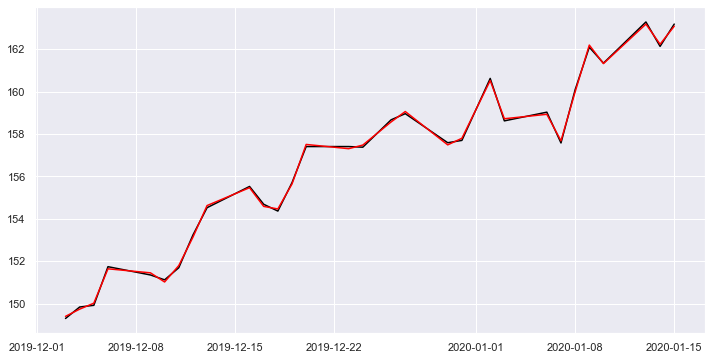

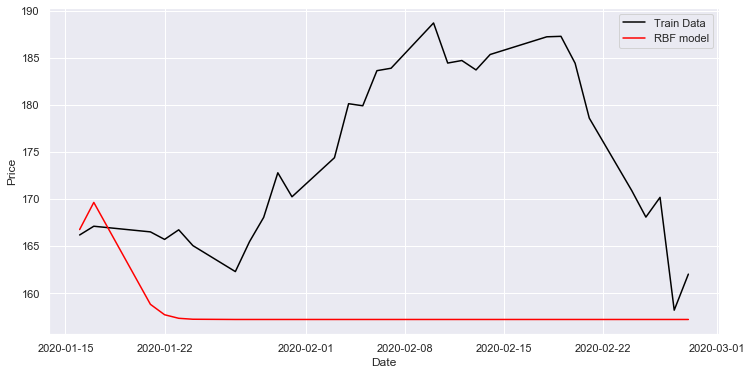

In [30]:
def predict_close_and_plot(ticker_df, orig_date_df, training_days_to_use):
    """
    Takes a Stock Ticker and the Original Date for Plotting Purposes
    """
    training_days_to_use = 30
    DF_Train_Index = round(len(ticker_df) * .99)
    # Splitting Dataset into 99 and 1%
    

    # Train Split 99%
    DF_Train = ticker_df[:DF_Train_Index]
    print("Train Length: {}".format(len(DF_Train)))

    # Test Split 1%
    DF_Test = ticker_df[DF_Train_Index:]
    print("Train Length: {}".format(len(DF_Test)))

    # Capture All Date Values for Stock Ticker - Should be ~3000
    ticker_dates = ticker_df['Date'].values

    # Capture All Close Values for Stock Ticker  - Should be ~3000
    ticker_close_prices = ticker_df['Close'].values

    print("+" * 30)
    # Train Split 99%
    ticker_train_prices = DF_Train['Close'].values
    ticker_train_dates = DF_Train['Date'].values
    num_train_dates = ticker_dates[:DF_Train_Index]
    print("Ticker_train_prices: {}".format(len(ticker_train_prices)))
    print("+" * 30)
    # Test Split 1%
    ticker_test_prices = DF_Test['Close'].values
    ticker_test_dates = DF_Test['Date'].values
    num_test_dates = ticker_dates[DF_Train_Index:]
    print("Ticker_train_prices: {}".format(len(ticker_test_prices)))

    # Train Data
    train_dates = np.reshape(num_train_dates, (len(DF_Train), 1))
    train_prices = np.reshape(ticker_train_prices, (len(DF_Train), 1))
    print("train_prices: {}".format(len(train_prices)))
    print("+" * 30)
    # Test Data
    test_dates = np.reshape(num_test_dates, (len(DF_Test), 1))
    test_prices = np.reshape(ticker_test_prices, (len(DF_Test), 1))
    print("train_prices: {}".format(len(test_prices)))
    print("+" * 30)

    # Fit training data using SVR/RBF
    svr_rbf = SVR(kernel= 'rbf', C= 10000, gamma= .1)
    #svr_rbf.fit(train_dates[-DF_Train_Index:], train_prices[-DF_Train_Index:])
    svr_rbf.fit(train_dates[-30:], train_prices[-30:])

    # Get predicted Data from Training Data
    print("############Predicting Phase##########")
    train_predicted = svr_rbf.predict(train_dates)
    test_predicted = svr_rbf.predict(test_dates)
    print("First 10 predicted: {}".format(test_predicted))
    print("First 10 actual: {}".format(test_prices))
    print("############Predicting Phase##########")

    model_score = svr_rbf.score(test_dates, test_prices)
    # Print score
    print("Score: {}".format(model_score))


    # Plot Train Data vs Predicted Price Data
    plt.figure(figsize = (12,6))
    plt.plot(orig_date_df[-60:-len(DF_Test)], train_prices[-len(DF_Test):], color= 'black', label= 'Train Data')
    plt.plot(orig_date_df[-60:-len(DF_Test)], train_predicted[-len(DF_Test):], color= 'red', label= 'RBF model')
    #plt.plot(orig_date_df[:len(ticker_train_dates[-len(DF_Test):])], train_prices[-len(DF_Test):], color= 'black', label= 'Train Data')
    #plt.plot(orig_date_df[:len(ticker_train_dates[-len(DF_Test):])], train_predicted[-len(DF_Test):], color= 'red', label= 'RBF model')


    # Plot Test Data vs Predicted Price Data
    plt.figure(figsize = (12,6))
    plt.plot(orig_date_df[-len(DF_Test):], test_prices[-len(DF_Test):], color= 'black', label= 'Train Data')
    plt.plot(orig_date_df[-len(DF_Test):], test_predicted[-len(DF_Test):], color= 'red', label= 'RBF model')

    #plt.plot(org_dates[:len(DF_Train_dates)], svr_rbf.predict(dates), color= 'red', label= 'RBF model')
    #plt.xlabel('Date')
    #plt.ylabel('Price')
    #plt.legend()

    #plt.plot(org_dates[:len(DF_Train_dates)], svr_rbf.predict(dates), color= 'red', label= 'RBF model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()


    plt.show()
predict_close_and_plot(MSFT, MSFT_dates, 30)